In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import itertools
import math
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.ndimage.filters import gaussian_filter, uniform_filter

C:\Users\Leo\AppData\Local\Temp\ipykernel_9096\122918228.py:10: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, uniform_filter
C:\Users\Leo\AppData\Local\Temp\ipykernel_9096\122918228.py:10: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, uniform_filter


In [31]:
# Read the text file with tab-separated values
df = pd.read_csv('G7_Share.txt', sep=';', index_col=0)
df

,Agricultural Sciences,Baseline for All Items,Biology & Biochemistry,Chemistry,Clinical Medicine,Computer Science,Economics & Business,Engineering,Environment/Ecology,Geosciences,...,Microbiology,Molecular Biology & Genetics,Multidisciplinary,Neuroscience & Behavior,Pharmacology & Toxicology,Physics,Plant & Animal Science,Psychiatry/Psychology,"Social Sciences, general",Space Science
Unit Name,,,,,,,,,,,,,,,,,,,,,
1980_GERMANY (FED REP GER),0.026989,0,0.090416,0.142821,0.275387,0.006482,0.007690,0.044750,0.004541,0.014575,...,0.010913,0.039001,0.004431,0.021313,0.039367,0.085802,0.051122,0.016296,0.032959,0.012744
1981_GERMANY (FED REP GER),0.022424,0,0.081084,0.136605,0.290019,0.008230,0.007219,0.038397,0.006905,0.016042,...,0.010811,0.030202,0.004603,0.025738,0.034631,0.091058,0.048336,0.015171,0.033445,0.016287
1982_GERMANY (FED REP GER),0.022104,0,0.086977,0.133169,0.299607,0.009181,0.008029,0.046448,0.005502,0.016442,...,0.010780,0.033812,0.004095,0.023992,0.038291,0.082211,0.045520,0.016634,0.029558,0.014523
1983_GERMANY (FED REP GER),0.021502,0,0.092864,0.133664,0.280546,0.009246,0.008626,0.044555,0.007043,0.017716,...,0.013093,0.026342,0.003816,0.029134,0.032827,0.089978,0.047409,0.018771,0.033757,0.014397
1984_GERMANY (FED REP GER),0.021145,0,0.086264,0.133635,0.276985,0.009037,0.008505,0.048079,0.007590,0.020377,...,0.013910,0.028617,0.003780,0.031836,0.033195,0.092673,0.046248,0.018340,0.031186,0.014973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017_Global Baseline,0.023869,0,0.044832,0.097111,0.265975,0.020881,0.015173,0.075728,0.029439,0.025185,...,0.010660,0.030065,0.003905,0.042126,0.027916,0.049868,0.041718,0.029432,0.068765,0.007298
2018_Global Baseline,0.023755,0,0.044152,0.095630,0.264047,0.021748,0.015198,0.081285,0.033570,0.026155,...,0.010436,0.026550,0.004097,0.038272,0.027455,0.048940,0.041202,0.029603,0.067926,0.007258
2019_Global Baseline,0.025065,0,0.042601,0.093104,0.254542,0.022315,0.016205,0.086963,0.036256,0.026054,...,0.010071,0.026670,0.003699,0.039025,0.027175,0.044957,0.039916,0.031153,0.070279,0.006759


In [44]:
def GenDataFrame(nombre_dataframe,ColName='Y',separacion = ';',IC=0):
    
    df = pd.read_csv(nombre_dataframe, sep=';', index_col=IC)
    
    df[ColName] = df.index
    
    df[['Año','Nombre']] = df[ColName].str.split('_',expand=True)
    
    contador = 0
    name_labels = df['Nombre'].unique()
    
    for name in name_labels:
        df.loc[df['Nombre']==name,'Nombre']=contador
        contador+=1
        
    del df['Año']
    
    return df

# Función para genera una reducción de dimensión a partir del algoritmo ingresado
def GDFReduccionDimension(nombre_dataframe,ColName='Y',separacion = ';',IC=0, algoritmo='UMAP'):
    
    df = pd.read_csv(nombre_dataframe, sep=';', index_col=IC)
    
    # Selección del algoritmo de reducción de dimensionalidad
    if algoritmo == 'UMAP':
        reducer = umap.UMAP(min_dist=0.9)
    elif algoritmo == 'PCA':
        reducer = PCA(n_components=2)
    elif algoritmo == 'MDS':
        reducer = MDS(n_components=2)
    else:
        raise ValueError("Algoritmo no soportado. Use 'UMAP', 'PCA' o 'MDS'.")

    # Aplicación del algoritmo seleccionado
    Share = reducer.fit_transform(df)

    dftS = pd.DataFrame(Share, index = df.index, columns=['D1', 'D2'])
    dftS[ColName] = dftS.index
    
    dftS[['Año','Nombre']] = dftS[ColName].str.split('_',expand=True)
    return dftS

# Función para determinar la mejor distribución de los subplots de las categorías
def encontrar_mejor_distribucion(numero):
    # Encontrar todos los divisores del número
    divisores = [i for i in range(1, numero+1) if numero % i == 0]

    # Calcular el índice del primer valor del medio
    indice_medio = len(divisores) // 2
    
    # Obtener los dos valores del medio
    valor1 = divisores[indice_medio]
    valor2 = divisores[indice_medio - 1] if len(divisores) % 2 == 0 else valor1
    
    return valor1, valor2


# Junta los datos iniciales con las columnas de reducción de dimensión
def DFColCompleto(dfts,dfUmap,ColName='Y'):
    
    merged_df = pd.merge(dfts, dfUmap, on=ColName, how='inner')
    merged_df.index = merged_df[ColName]
    
    del merged_df['Nombre_x']
    del merged_df['Nombre_y']
    del merged_df['Año']
    del merged_df[ColName]

    return merged_df


# Grafica los datos obtenidos del algoritmo de reducción de dimensión para cada parametro
def GraficoPorCategorias(DF_C, largo, ancho):
    names_col = DF_C.columns.tolist()[:-2] # Quitar las columnas de reducción de dimensión de la lista de columnas
    numero = len(names_col)
    val1,val2 = encontrar_mejor_distribucion(numero)

    fig, axes = plt.subplots(nrows=val1, ncols=val2)
    contador=0
    for ax in axes.flat:

        im = ax.hexbin(DF_C['D1'],DF_C['D2'], C=DF_C[names_col[contador]], gridsize = 10,
                       cmap = "magma", alpha = 0.9,reduce_C_function=np.mean)

        fig.colorbar(im)

        ax.set_title(names_col[contador])
        contador+=1
    
    fig.subplots_adjust( bottom=0, right=ancho, top=largo)

    return plt.show()

def GraficoPorCategoriasSuavisado(DF_C,largo,ancho):
    names_col = DF_C.columns.tolist()[:-2]
    numero = len(names_col)
    val1,val2 = encontrar_mejor_distribucion(numero)
    # Definir los límites de la región de los datos
    xmin, xmax = DF_C['D1'].min(), DF_C['D1'].max()
    ymin, ymax = DF_C['D2'].min(), DF_C['D2'].max()

    # Definir la resolución del gráfico de hexágonos
    gridsize = 30

    # Generar coordenadas para los hexágonos sin información
    x_empty, y_empty = np.meshgrid(np.linspace(xmin, xmax, gridsize), np.linspace(ymin, ymax, gridsize))
    x_empty = x_empty.flatten()
    y_empty = y_empty.flatten()

    # Extender el DataFrame original con las coordenadas de los hexágonos sin información
    empty_df = pd.DataFrame({'D1': x_empty, 'D2': y_empty})

    # Concatenar el DataFrame original con el DataFrame de hexágonos sin información
    extended_df = pd.concat([DF_C, empty_df])

    extended_df = extended_df.fillna(0)

    fig, axes = plt.subplots(nrows=val1, ncols=val2)
    contador=0
    for ax in axes.flat:

        im = ax.hexbin(extended_df['D1'],extended_df['D2'], C=extended_df[names_col[contador]], gridsize = 10,
                       cmap = "magma", alpha = 0.9,reduce_C_function=np.mean, extent=(xmin, xmax, ymin, ymax))

        # Calcular un filtro uniforme alrededor de cada hexágono
        smoothed_data = uniform_filter(im.get_array(), size=2)

        # Identificar hexágonos adyacentes sin información
        masked_data = np.ma.masked_where(im.get_array() > 0, im.get_array())

        # Colorear los hexágonos adyacentes sin información con el gradiente suavizado
        im.set_array(smoothed_data + masked_data)

        # Colorear los hexágonos con el gradiente suavizado
        im.set_array(smoothed_data)

        plt.colorbar(im)

        ax.set_title(names_col[contador])

        contador+=1
    
    # Put a legend below current axis
    fig.subplots_adjust( bottom=1,left=0, right=ancho, top=largo)
    
    return plt.show()

In [33]:
dftS = GenDataFrame('G7_Share.txt',ColName='Y',separacion = ';',IC=0)

df_DR = GDFReduccionDimension('G7_Share.txt',ColName='Y',separacion = ';',IC=0, algoritmo = 'PCA')
DF_Com = DFColCompleto(dftS,df_DR,ColName='Y')

In [34]:
DF_Com

,Agricultural Sciences,Baseline for All Items,Biology & Biochemistry,Chemistry,Clinical Medicine,Computer Science,Economics & Business,Engineering,Environment/Ecology,Geosciences,...,Multidisciplinary,Neuroscience & Behavior,Pharmacology & Toxicology,Physics,Plant & Animal Science,Psychiatry/Psychology,"Social Sciences, general",Space Science,D1,D2
Y,,,,,,,,,,,,,,,,,,,,,
1980_GERMANY (FED REP GER),0.026989,0,0.090416,0.142821,0.275387,0.006482,0.007690,0.044750,0.004541,0.014575,...,0.004431,0.021313,0.039367,0.085802,0.051122,0.016296,0.032959,0.012744,0.043304,-0.020649
1981_GERMANY (FED REP GER),0.022424,0,0.081084,0.136605,0.290019,0.008230,0.007219,0.038397,0.006905,0.016042,...,0.004603,0.025738,0.034631,0.091058,0.048336,0.015171,0.033445,0.016287,0.035797,-0.037072
1982_GERMANY (FED REP GER),0.022104,0,0.086977,0.133169,0.299607,0.009181,0.008029,0.046448,0.005502,0.016442,...,0.004095,0.023992,0.038291,0.082211,0.045520,0.016634,0.029558,0.014523,0.029325,-0.044182
1983_GERMANY (FED REP GER),0.021502,0,0.092864,0.133664,0.280546,0.009246,0.008626,0.044555,0.007043,0.017716,...,0.003816,0.029134,0.032827,0.089978,0.047409,0.018771,0.033757,0.014397,0.037149,-0.026264
1984_GERMANY (FED REP GER),0.021145,0,0.086264,0.133635,0.276985,0.009037,0.008505,0.048079,0.007590,0.020377,...,0.003780,0.031836,0.033195,0.092673,0.046248,0.018340,0.031186,0.014973,0.039789,-0.026022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017_Global Baseline,0.023869,0,0.044832,0.097111,0.265975,0.020881,0.015173,0.075728,0.029439,0.025185,...,0.003905,0.042126,0.027916,0.049868,0.041718,0.029432,0.068765,0.007298,-0.027806,-0.003668
2018_Global Baseline,0.023755,0,0.044152,0.095630,0.264047,0.021748,0.015198,0.081285,0.033570,0.026155,...,0.004097,0.038272,0.027455,0.048940,0.041202,0.029603,0.067926,0.007258,-0.028447,-0.002038
2019_Global Baseline,0.025065,0,0.042601,0.093104,0.254542,0.022315,0.016205,0.086963,0.036256,0.026054,...,0.003699,0.039025,0.027175,0.044957,0.039916,0.031153,0.070279,0.006759,-0.030478,0.006898


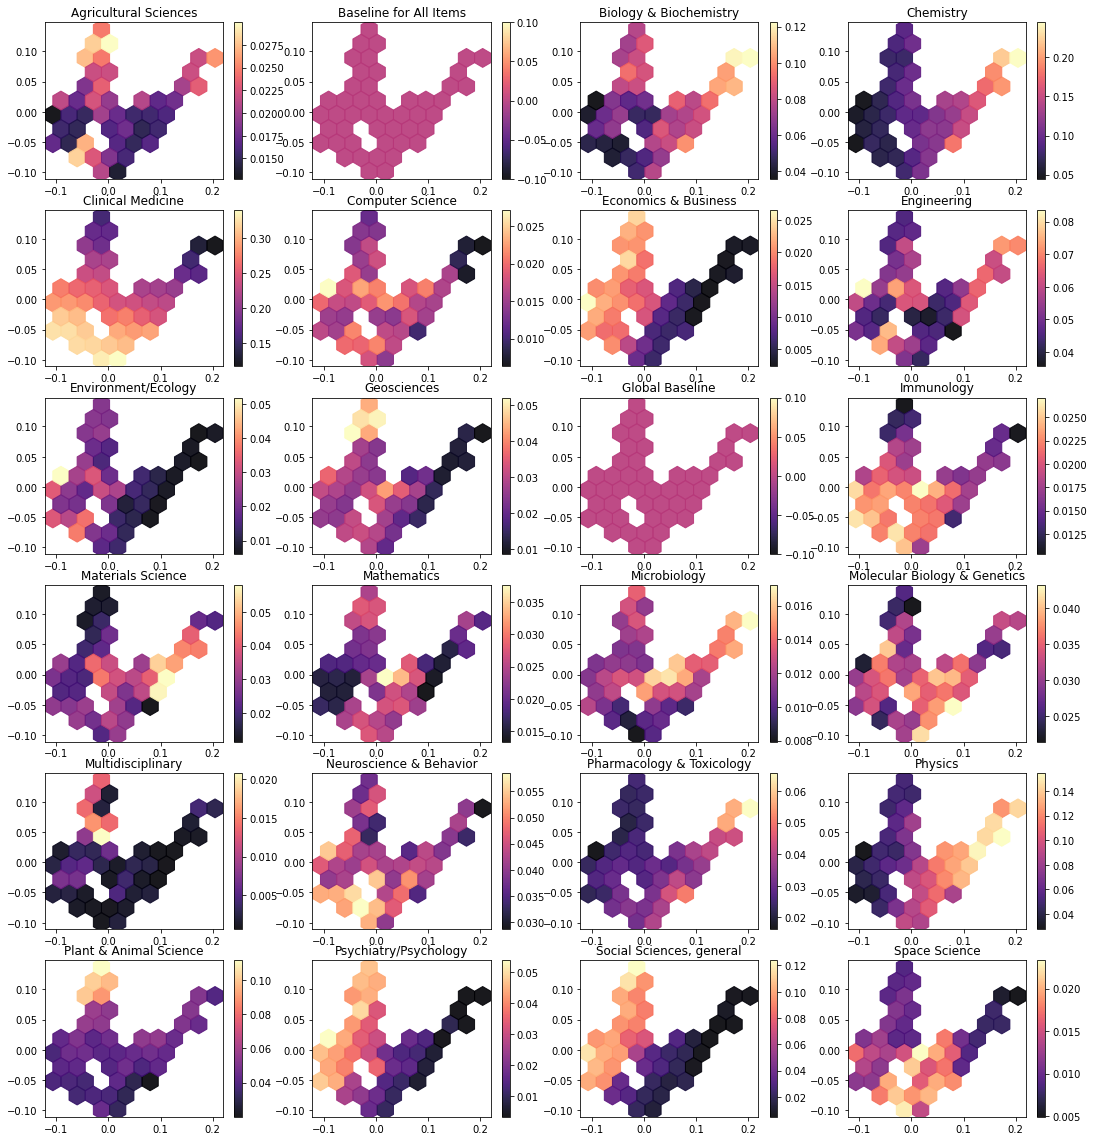

In [42]:
GraficoPorCategorias(DF_Com, largo=3.8, ancho=2.5)

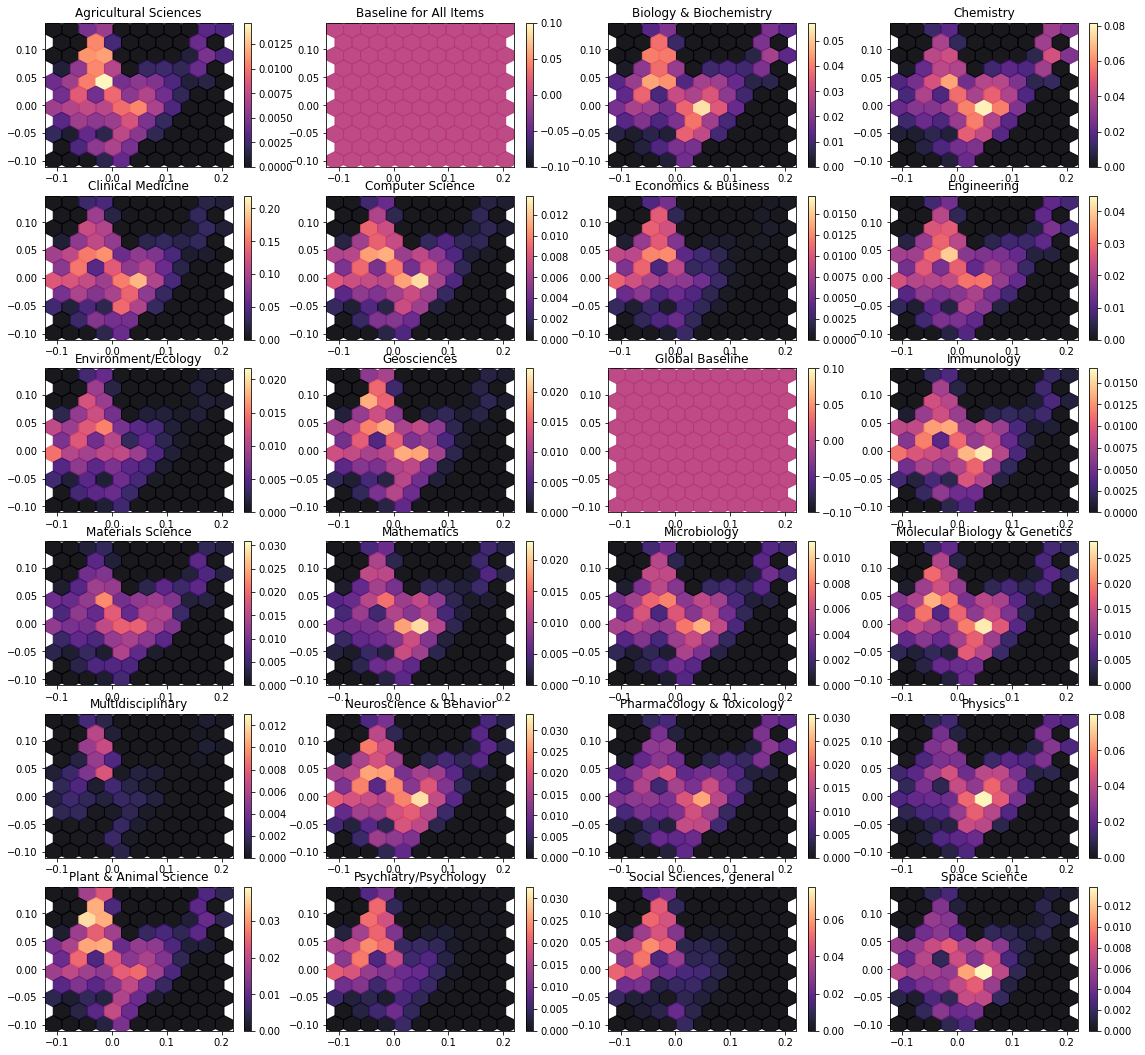

In [47]:
GraficoPorCategoriasSuavisado(DF_Com,largo=4.5,ancho=2.5)